# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amelia Yunisa
- **Email:** a180xbm054@devacademy.id
- **ID Dicoding:** A180XBM054

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda setiap jam?
2. Bagaimana pola peminjaman sepeda selama hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# 0. Import Library
import pandas as pd  # Manipulasi data
import numpy as np  # Operasi numerik
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns  # Visualisasi lebih menarik

## Data Wrangling

### Gathering Data

In [3]:

# Load dataset
df = pd.read_csv("hour.csv")  # Data per jam
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Berdasarkan output di atas, terdapat beberapa kolom utama dalam dataset yang dapat dianalisis, antara lain:

1. instant : Indeks unik untuk setiap entri data.
2. dteday : Tanggal peminjaman sepeda. Dalam data ini, semua baris berasal dari 1 Januari 2011.
3. season : Musim saat data dicatat (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin). Data ini berada di musim semi.
4. yr : Tahun data dicatat (0 = 2011, 1 = 2012).
5. mnth : Bulan pencatatan (1 = Januari, 2 = Februari, dst.). Semua data berasal dari bulan Januari.
6. hr : Jam dalam sehari (0 - 23). Data ini mencakup jam 00:00 hingga 04:00.
7. holiday : Indikator hari libur (0 = Bukan hari libur, 1 = Hari libur). Data ini menunjukkan bukan hari libur.
8. weekday : Hari dalam seminggu (0 = Minggu, 1 = Senin, dst.). Nilainya 6, berarti data diambil pada hari Sabtu.
9. workingday : Indikator hari kerja (0 = Bukan hari kerja, 1 = Hari kerja). Karena nilainya 0, ini adalah hari libur akhir pekan.
10. weathersit : Kondisi cuaca saat pencatatan (1 = Cerah, 2 = Berawan, 3 = Hujan, 4 = Cuaca buruk). Semua baris menunjukkan nilai 1, yang berarti cerah atau sedikit berawan.
11. temp : Suhu dalam skala normalisasi (0 - 1). Dalam data ini berkisar antara 0.22 - 0.24, yang berarti suhunya cukup rendah.
12. atemp : Suhu yang terasa (juga dalam skala normalisasi).
13. hum : Kelembaban udara (0 - 1). Data ini memiliki kelembaban tinggi (0.75 - 0.81).
14. windspeed : Kecepatan angin (0 - 1). Semua data menunjukkan 0.0, artinya tidak ada angin saat itu.
15. casual : Jumlah pengguna sepeda yang tidak terdaftar.
16. registered : Jumlah pengguna sepeda yang terdaftar.
17. cnt : Total peminjaman sepeda (cnt = casual + registered).

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:** tidak ada data yang terduplikasi dalam dataset.

In [5]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:** tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat missing value.

### Cleaning Data

In [6]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df[column] = pd.to_datetime(df[column])

  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

 Hasil output df.info() menunjukkan bahwa dataset memiliki 17379 baris dan 19 kolom dengan berbagai tipe data, termasuk int64, float64, datetime64, category, dan object. Kolom dteday berhasil dikonversi ke datetime64[ns], memungkinkan analisis berbasis waktu. Tidak ada data yang hilang maupun duplikasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
1. Distribusi Data
- Dataset memiliki 17379 entri, dan tidak ada data yang hilang.
- Rata-rata suhu (temp) adalah 0.497, dengan minimum 0.02 dan maksimum 1.0 (kemungkinan dinormalisasi).
- Kelembaban (hum) berkisar antara 0.0 hingga 1.0, dengan median 0.4848, menunjukkan variasi kelembaban cukup merata.
- Kecepatan angin (windspeed) memiliki nilai maksimum 0.8507, dengan median 0.1940, menunjukkan sebagian besar data memiliki kecepatan angin yang relatif rendah.

2. Pola Pemakaian Sepeda
- Rata-rata jumlah peminjaman sepeda total (cnt) adalah 171, dengan minimum 1 dan maksimum 642.
- Peminjaman sepeda oleh pengguna terdaftar (registered) jauh lebih tinggi (rata-rata 153) dibandingkan pengguna kasual (casual) yang hanya sekitar 35. Ini menunjukkan mayoritas peminjam adalah pelanggan tetap.

3. Waktu dan Musim
- Dataset mencakup dua tahun (2011–2012), dengan median tanggal di sekitar Januari 2012.
- Variabel season menunjukkan nilai minimum 1 dan maksimum 4, mencakup semua musim.
- Variabel hr berkisar antara 0 hingga 23, menunjukkan data mencakup seluruh jam dalam sehari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

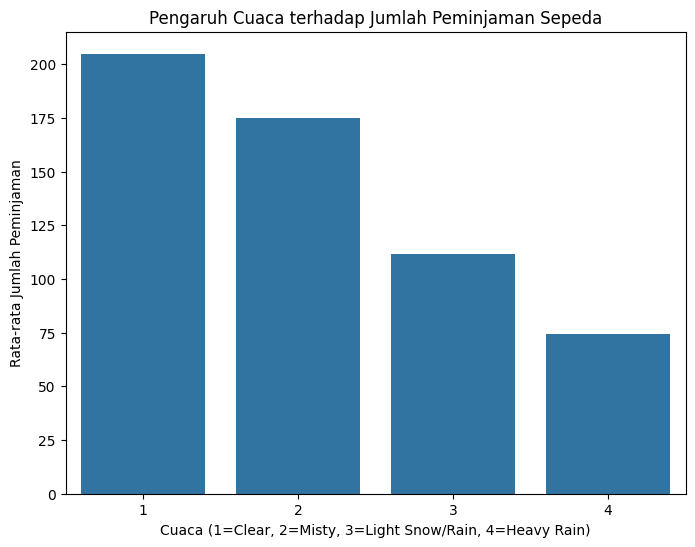

In [12]:
# Visualisasi pengaruh cuaca terhadap jumlah peminjaman sepeda
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=df, errorbar=None, estimator=np.mean)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca (1=Clear, 2=Misty, 3=Light Snow/Rain, 4=Heavy Rain)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


In [13]:
# Rata-rata jumlah peminjaman per kondisi cuaca
weather_avg = df.groupby('weathersit')['cnt'].mean().reset_index()
print("Rata-rata peminjaman per kondisi cuaca:")
print(weather_avg)

Rata-rata peminjaman per kondisi cuaca:
   weathersit         cnt
0           1  204.869272
1           2  175.165493
2           3  111.579281
3           4   74.333333


**Insight:**

Jumlah peminjaman sepeda tertinggi terjadi saat cuaca cerah (204.87), kemudian menurun saat cuaca berkabut atau mendung (175.17), dan semakin berkurang saat hujan ringan atau salju (111.58). Peminjaman paling rendah terjadi saat hujan lebat (74.33). Ini menunjukkan bahwa kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda.

### Pertanyaan 2:

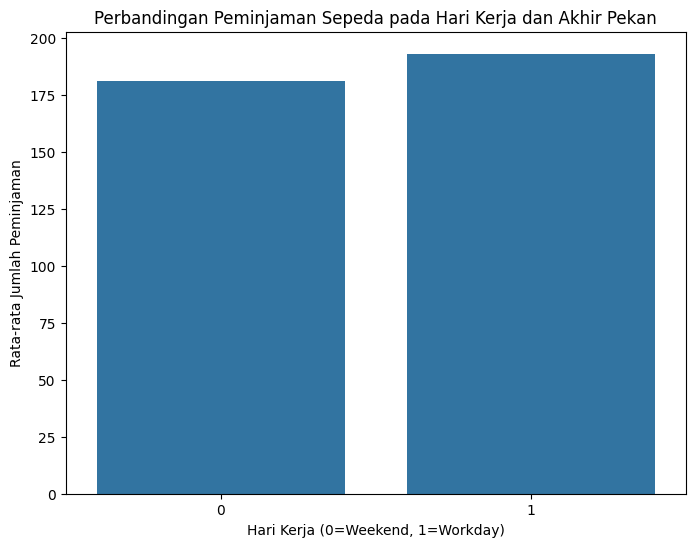

In [14]:
# Visualisasi pola peminjaman selama hari kerja vs akhir pekan
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=df, errorbar=None, estimator=np.mean)
plt.title('Perbandingan Peminjaman Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (0=Weekend, 1=Workday)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

In [15]:
# Rata-rata jumlah peminjaman pada hari kerja dan akhir pekan
workday_avg = df.groupby('workingday')['cnt'].mean().reset_index()
print("Rata-rata peminjaman pada hari kerja dan akhir pekan:")
print(workday_avg)


Rata-rata peminjaman pada hari kerja dan akhir pekan:
   workingday         cnt
0           0  181.405332
1           1  193.207754


**Insight:**
- Peminjaman lebih tinggi pada hari kerja (193.21) dibanding akhir pekan (181.41).
- Selisihnya kecil, menunjukkan penggunaan sepeda relatif stabil di kedua periode.

## Conclusion

- Cuaca yang lebih baik (cerah atau sedikit berawan) meningkatkan jumlah peminjaman sepeda, sedangkan kondisi cuaca ekstrem seperti hujan lebat atau salju secara signifikan mengurangi jumlah peminjaman. Pengguna cenderung lebih aktif menggunakan sepeda saat kondisi cuaca mendukung.
- Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama untuk aktivitas sehari-hari seperti bekerja atau sekolah, daripada sekadar untuk rekreasi di akhir pekan.

In [23]:
df.to_csv("all_data.csv", index=False)